#### Python Data Mastery - A Hands-On Guide to Efficient Data Analysis for Engineers and Students
#### Chapter 1 - Python Basics for Data Analysis

<style>
td,th {
font-size: 10px    
}
</style>


##### Python Syntax and Data Types 

In [2]:
def analyze_data(dataset):
    for item in dataset:
        if item > 0:
            print("Posistive value found")
        else:
            print("Non-positive value found")

In [ ]:
import numpy as np
import pandas as pd

# Create a NumPy array
data = np.array([1, 2, 3, 4, 5])

# Creatig pandas series
series = pd.Series(data, name="Values")

# Creating a pandas DataFrame
df = pd.DataFrame(
    {
        "ID": [1, 2, 3, 4, 5],
        "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
        "Score": [95.5, 87.2, 91.8, 76.9, 88.3],
    }
)

print(df.dtypes)

##### Control Structures and Functions

In [1]:
import pandas as pd
from pathlib import Path
import json

# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_csv_file_path = Path(config["sales_data_csv"])

# Check if the file exists
if not csv_csv_file_path.exists():
    print(f"File not found: {csv_csv_file_path}")
else:
    # Load the dataset
    df = pd.read_csv(csv_csv_file_path, sep=",")

    # Conditional statement to categorize sales
    def categorize_sale(amount: int) -> str:
        if amount < 100:
            return "Low"
        elif 100 <= amount < 1000:
            return "Medium"
        else:
            return "High"

    # Apply the categorization to the dataset
    df["SaleCategory"] = df["SaleAmount"].apply(categorize_sale)

    # Loop through the dataset to calculate total sales by category
    category_totals = {"Low": 0, "Medium": 0, "High": 0}

    for index, row in df.iterrows():
        category_totals[row["SaleCategory"]] += row["SaleAmount"]

    print(category_totals)

{'Low': 125, 'Medium': 2700, 'High': 3200}


Explanation of Changes in the previous code:  

Loading the Config File: The path to the CSV file is dynamically loaded from **config_data.json**.

No Hardcoding: The CSV file path is no longer hardcoded in the script; it is fetched from the configuration file.  

This makes the script more flexible, as you can easily change the file paths by updating the configuration file without modifying the code itself.

Let's change the hardcoded path not using 'pathlib' but 'os'.

In [4]:
import pandas as pd
import os

# Set base_path to the current working directory
base_path = os.getcwd()
csv_file_path = os.path.join(base_path, "data/sales_data.csv")

df = pd.read_csv(csv_file_path, sep=",")


# Conditional statement to categorize sales
def categorize_sale(amount):
    def categorize_sale(amount: int) -> str:
        if amount < 100:
            return "Low"
        elif 100 <= amount < 1000:
            return "Medium"
        else:
            return "High"


# Apply the categorization to the dataset
df["SaleCategory"] = df["SaleAmount"].apply(categorize_sale)

# Loop through the dataset to calculate total sales by category
category_totals = {"Low": 0, "Medium": 0, "High": 0}

for index, row in df.iterrows():
    category_totals[row["SaleCategory"]] += row["SaleAmount"]

# Print the final result
print(category_totals)

{'Low': 125, 'Medium': 2700, 'High': 3200}


When to work with 'pathlib' or 'os' considering the hardcoded path?

Both pathlib and os modules in Python are used for handling file paths, but they have different strengths and use cases. Here’s a quick comparison to help you decide when to use each:

##### pathlib  

Object-Oriented: pathlib provides an object-oriented approach to handling file paths, making the code more readable and intuitive.  

Cross-Platform: It automatically handles different path formats across operating systems (e.g., Windows vs. Unix).  

Modern Features: Introduced in Python 3.4, it includes many modern features and methods for common file operations.  

Path Operations: Simplifies complex path manipulations and makes them more readable.

##### os and os.path  

Legacy Support: os and os.path have been around for a long time and are well-suited for scripts that need to run on older Python versions.  

Procedural Approach: Uses a more traditional, procedural approach to path handling.  

Specific Functions: Provides specific functions for various file operations, which can be useful for quick scripts.

Let's repeat the last code using 'match' statement to evaluate the subject which is the value after the match keyword and checks it against patterns.

In [2]:
import pandas as pd
from pathlib import Path
import json

# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_file_path = Path(config["sales_data_csv"])

# Check if the file exists
if not csv_file_path.exists():
    print(f"File not found: {csv_file_path}")
else:
    # Load the dataset
    df = pd.read_csv(csv_file_path, sep=",")
    # Load the dataset
    df = pd.read_csv(csv_file_path, sep=",")

    # Match statement to categorize sales
    def categorize_sale(amount: int) -> str:
        match amount:
            case amount if amount < 100:
                return "Low"
            case amount if 100 <= amount < 1000:
                return "Medium"
            case _:
                return "High"

    # Apply the categorization to the dataset
    df["SaleCategory"] = df["SaleAmount"].apply(categorize_sale)

    # Loop through the dataset to calculate total sales by category
    category_totals = {"Low": 0, "Medium": 0, "High": 0}

    for index, row in df.iterrows():
        category_totals[row["SaleCategory"]] += row["SaleAmount"]

    print(category_totals)

{'Low': 125, 'Medium': 2700, 'High': 3200}


Data loaded successfully.
        Date  SaleAmount
0 2023-01-15         500
1 2023-01-22         750
2 2023-02-05         300
3 2023-02-18         950
4 2023-03-01        1200


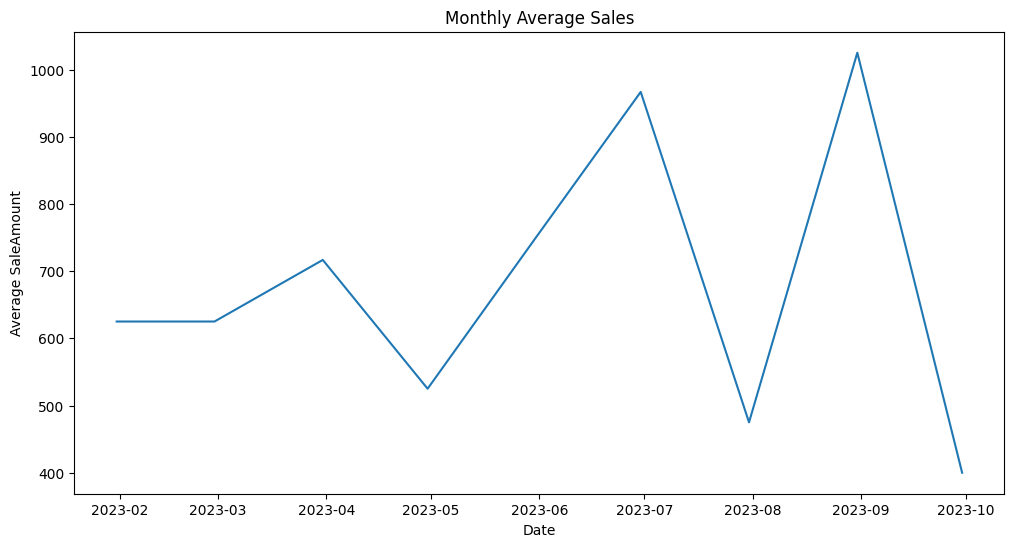

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path


# Ensure %matplotlib inline is in the first cell
%matplotlib inline

# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_file_path = Path(config["sales_data_1_csv"])


def load_and_clean_data(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path)
        print("Data loaded successfully.")
        df.dropna(inplace=True)
        df["Date"] = pd.to_datetime(df["Date"])
        print(df.head())  # Check the first few rows
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


def calculate_monthly_average(df, column_name):
    return df.resample("ME", on="Date")[column_name].mean()


def plot_monthly_trend(df, column_name, title):
    try:
        monthly_avg = calculate_monthly_average(df, column_name)
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_avg.index, monthly_avg.values)
        plt.title(title)
        plt.xlabel("Date")
        plt.ylabel("Average " + column_name)
        plt.show()
    except Exception as e:
        print(f"Error plotting data: {e}")


# Usage
sales_data = load_and_clean_data(csv_file_path)
if sales_data is not None:
    plot_monthly_trend(sales_data, "SaleAmount", "Monthly Average Sales")

Another important aspect of Python functions in data analysis
is the use of *args and **kwargs. These allow you to create
flexible functions that can accept a variable number of
arguments. This can be particularly useful when creating
analysis functions that need to work with different datasets or
parameters:

This function can analyze any number of columns and
optionally create a plot, demonstrating the flexibility that *args
and **kwargs provide.



SaleAmount: Mean = 301.56, Std Dev = 109.02
Profit: Mean = 57.40, Std Dev = 25.28


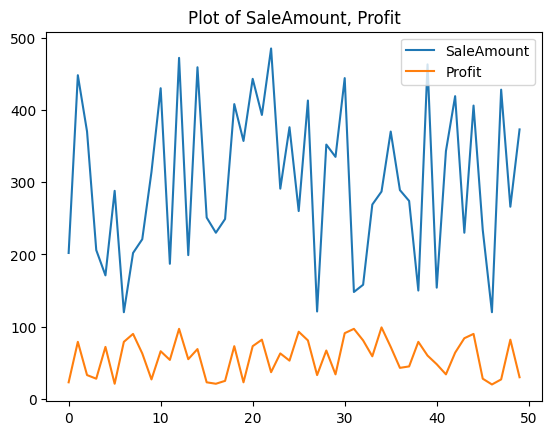

In [4]:
import pandas as pd
import numpy as np

# Create a mock DataFrame with random sample data
np.random.seed(42)  # For reproducibility

data = {
    "SaleAmount": np.random.randint(
        100, 500, size=50
    ),  # Random integers between 100 and 500
    "Profit": np.random.randint(20, 100, size=50),  # Random integers between 20 and 100
}
df = pd.DataFrame(data)


# Function to analyze columns
def analyze_columns(df, *columns, **kwargs):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        print(f"{column}: Mean = {mean:.2f}, Std Dev = {std:.2f}")

    # Check if 'plot' is in kwargs and set to True
    if "plot" in kwargs and kwargs["plot"]:
        df[list(columns)].plot()
        plt.title(f"Plot of {', '.join(columns)}")
        plt.show()


# Usage
analyze_columns(df, "SaleAmount", "Profit", plot=True)

##### File Handling in Python

Let's start with the basics of file handling in Python. The fundamental operations involve opening a file, reading from or writing to it, and then closing the file. Python's `with` statement is particularly useful for file operations as it ensures that the file is properly closed after you're done with it, even if an exception occurs. Here's a simple example of reading a text
file:


In [8]:
import json
from pathlib import Path

# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_file_path = Path(config["data_file"])

with open(csv_file_path, "r") as file:
    data = file.read()
    print(data)

Learning about file handling in Python


In data analysis, you'll often work with structured data formats like CSV (Comma-Separated Values). While you can use Python's built-in file handling to read CSV files line by line, the `csv` module provides more convenient tools for working with this format:

In [9]:
import csv
import json
from pathlib import Path


# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_file_path = Path(config["sales_data_csv"])

with open(csv_file_path, "r") as file:
    csv_reader = csv.reader(file)
    headers = next(csv_reader)  # Read the header row
    for row in csv_reader:
        # Process each row of data
        print(f"Sale ID: {row[0]}, Sale_Amount: {row[1]}")

""" This example reads a CSV file, skips the header row, and then processes each subsequent row of data."""

Sale ID: 1, Sale_Amount: John Doe
Sale ID: 2, Sale_Amount: Jane Smith
Sale ID: 3, Sale_Amount: Robert Brown
Sale ID: 4, Sale_Amount: Emily Davis
Sale ID: 5, Sale_Amount: Michael Clark
Sale ID: 6, Sale_Amount: Linda Scott
Sale ID: 7, Sale_Amount: Paul Adams
Sale ID: 8, Sale_Amount: Nancy White
Sale ID: 10, Sale_Amount: Karen Turner


' This example reads a CSV file, skips the header row, and then processes each subsequent row of data.'

However, for more advanced data analysis tasks, you'll likely use pandas, which provides powerful tools for reading various file formats. Pandas can efficiently read large CSV files and automatically convert them into DataFrame objects, which are ideal for data manipulation and analysis:



In [7]:
import pandas as pd
import json
from pathlib import Path


# Load the config file
config_path = Path("data/config_data.json")  # Path to your config file
with config_path.open() as config_file:
    config = json.load(config_file)

# Get the CSV file path from the config (relative path)
csv_file_path = Path(config["sales_data_csv"])

# Reading a CSV file
df = pd.read_csv(csv_file_path)
# Basic data exploration
print(df.head())
print(df.describe())
# Writing the processed data back to a CSV file
df.to_csv(
    "/home/charles/github/repos/learn-pandas/output/processed_sales_data.csv",
    index=False,
)

   SaleID       Customer  SaleAmount
0       1       John Doe          50
1       2     Jane Smith         150
2       3   Robert Brown         950
3       4    Emily Davis        2000
4       5  Michael Clark         800
          SaleID   SaleAmount
count   9.000000     9.000000
mean    5.111111   669.444444
std     2.934469   644.177986
min     1.000000    50.000000
25%     3.000000   150.000000
50%     5.000000   500.000000
75%     7.000000   950.000000
max    10.000000  2000.000000


This code snippet demonstrates how to read a CSV file into a pandas DataFrame, perform some basic exploratory data
analysis, and then write the processed data back to a new CSV file.

JSON (JavaScript Object Notation) is another common format for storing and exchanging data. Python's `json` module
provides tools for working with JSON data:

In [9]:
import json
from pathlib import Path

# Define the correct path to the CSV file
json_csv_file_path = Path("/home/charles/github/repos/learn-pandas/data/config.json")

with open(json_csv_file_path, "r") as file:
    config = json.load(file)

print(config["database"])

# Writing JSON data
data = {"name": "Alice", "age": 30, "city": "New York"}
with open("/home/charles/github/repos/learn-pandas/output/output.json", "w") as file:
    json.dump(data, file, indent=4)

{'host': 'localhost', 'port': 5432, 'user': 'dbuser', 'password': 'password123', 'dbname': 'sampledb'}


This example shows how to read a JSON configuration file and how to write data to a JSON file. The `indent` parameter in `json.dump()` is used to format the output file for better readability.

For larger JSON datasets, pandas again comes to the rescue with its `read_json()` function:

In [ ]:
import pandas as pd
from pathlib import Path

# Define the correct path to the CSV file
json_csv_file_path = Path(
    "/home/charles/github/repos/learn-pandas/data/large_dataset.json"
)

# Reading a JSON file into a DataFrame
df = pd.read_json(json_csv_file_path)

# Processing the data
processed_df = df[df["stock"] > 25].groupby("city").mean()

# Writing the processed data to a new JSON file
processed_df.to_json(
    "/home/charles/github/repos/learn-pandas/output/processed_data.json",
    orient="records",
)

The error ValueError: All arrays must be of the same length occurs because pandas.read_json expects a JSON file to be structured in a way that forms a valid DataFrame. However, the structure of your large_dataset.json might not be directly suitable for this. JSON files can have nested or irregular structures, and Pandas requires consistent key-value pairs to form a proper DataFrame.

To resolve this issue, you may need to flatten the JSON structure or focus on specific parts of the data. Here's a step-by-step process:

1. Check the Structure of the JSON File  

First, let's load and inspect the structure of the JSON file:

In [12]:
import json
from pathlib import Path

# Load the JSON file
json_csv_file_path = Path(
    "/home/charles/github/repos/learn-pandas/data/large_dataset.json"
)
with open(json_csv_file_path, "r") as f:
    data = json.load(f)

# Check the structure of the data
print(json.dumps(data, indent=4))

{
    "metadata": {
        "generated_at": "2024-10-09T15:30:00Z",
        "dataset_id": "LARGE_DATASET_001",
        "version": "1.0.0"
    },
    "users": [
        {
            "id": 1,
            "name": "John Doe",
            "email": "john.doe@example.com",
            "address": {
                "street": "123 Elm St",
                "city": "Springfield",
                "zip": "62704",
                "country": "USA"
            },
            "orders": [
                {
                    "order_id": "ORD001",
                    "date": "2024-09-15T13:45:30Z",
                    "items": [
                        {
                            "product_id": "P001",
                            "name": "Laptop",
                            "quantity": 1,
                            "price": 999.99
                        },
                        {
                            "product_id": "P002",
                            "name": "Wireless Mouse",
               

This will help you understand if the JSON structure is nested or if certain fields need to be extracted.

2. Flatten the JSON Structure  

If the JSON has nested structures (like users, products, etc.), you will need to normalize it to a flat structure. You can use pd.json_normalize() to achieve this:

In [13]:
import pandas as pd
import json
from pathlib import Path


# Load the JSON file
json_csv_file_path = Path(
    "/home/charles/github/repos/learn-pandas/data/large_dataset.json"
)
with open(json_csv_file_path, "r") as f:
    data = json.load(f)

# Normalize the JSON data
df = pd.json_normalize(data["products"])  # or data['users'], depending on what you want

# Inspect the DataFrame
print(df.head())

     id            name     category   price  stock
0  P001          Laptop  Electronics  999.99     25
1  P002  Wireless Mouse  Electronics   19.99    200
2  P003        Keyboard  Electronics   49.99    150
3  P004      Smartphone  Electronics  799.99     50


3. Modify Your Processing Logic  

Once you have the products or relevant part of the dataset flattened into a DataFrame, you can filter and process it. For example:

In [ ]:
# Assuming we are working with 'products' and filtering by 'stock'
processed_df = df[df["stock"] > 25].groupby("category").mean()

# Writing the processed data to a new JSON file
processed_df.to_json(
    "/home/charles/github/repos/learn-pandas/output/processed_data.json",
    orient="records",
)

The error TypeError: agg function failed [how->mean,dtype->object] occurs because groupby().mean() expects numerical columns, but your DataFrame contains non-numeric data (e.g., strings or objects like category or other fields).

To resolve this, you need to:

Ensure that only numeric columns are used in aggregation functions like mean().
Exclude non-numeric columns from the mean() calculation or explicitly choose the numeric columns you want to aggregate.  

Here’s a revised approach:

1. Exclude Non-Numeric Columns for Aggregation
You can filter out the non-numeric columns before applying mean():

In [15]:
# Group by 'category' and select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include="number").columns
processed_df = df[df["stock"] > 25].groupby("category")[numeric_columns].mean()

# Writing the processed data to a new JSON file
processed_df.to_json(
    "/home/charles/github/repos/learn-pandas/output/processed_data.json",
    orient="records",
)

2. Check the Data Types  

It’s useful to check the data types in your DataFrame to see which columns are causing issues:

In [16]:
print(df.dtypes)

id           object
name         object
category     object
price       float64
stock         int64
dtype: object


This will help you identify non-numeric columns, so you can exclude them from the aggregation step.

Example Code with Full Flow:

In [17]:
import pandas as pd
import json
from pathlib import Path


# Load the JSON file
json_csv_file_path = Path(
    "/home/charles/github/repos/learn-pandas/data/large_dataset.json"
)
with open(json_csv_file_path, "r") as f:
    data = json.load(f)

# Normalize the 'products' part of the data
df = pd.json_normalize(data["products"])

# Check the data types
print(df.dtypes)

# Filter by stock and group by 'category', aggregating only numeric columns
numeric_columns = df.select_dtypes(include="number").columns
processed_df = df[df["stock"] > 25].groupby("category")[numeric_columns].mean()

# Write the processed data to a new JSON file
processed_df.to_json(
    "/home/charles/github/repos/learn-pandas/data/processed_data.json", orient="records"
)

id           object
name         object
category     object
price       float64
stock         int64
dtype: object


Explanation:  

select_dtypes(include='number'): This filters out only the numeric columns (like stock, price, etc.).

groupby('category')[numeric_columns].mean(): Groups the data by category and calculates the mean of only numeric columns (e.g., stock, price).


When working with very large datasets that don't fit into memory, you may need to process files in chunks. Pandas provides options for this as well:

In [ ]:
import pandas as pd

chunk_size = 10000  # Number of rows per chunk
chunks = []
# Read and process the file in chunks
for chunk in pd.read_csv("very_large_file.csv", chunksize=chunk_size):
    # Process each chunk
    processed_chunk = chunk[chunk["value"] > 0].copy()
    processed_chunk["squared"] = processed_chunk["value"] ** 2
    chunks.append(processed_chunk)
# Combine all processed chunks
result = pd.concat(chunks, ignore_index=True)

This approach allows you to process large files that exceed your system's memory capacity, which is a common scenario in big data analysis.

In addition to CSV and JSON, Python and pandas support many other file formats commonly used in data analysis,including Excel files (`.xlsx`), SQL databases, and more specialized formats like HDF5 for large scientific datasets.

Here's a quick example of reading an Excel file:

In [ ]:
import pandas as pd

# Reading an Excel file
df = pd.read_excel("financial_data.xlsx", sheet_name="Q3_Sales")
# Writing to an Excel file
df.to_excel(
    "processed_financial_data.xlsx", sheet_name="Processed_Q3_Sales", index=False
)

To use a module in your Python script, you use the `import` statement. Here's an example using the built-in `math` module:


In [10]:
import math

radius = 5
area = math.pi * math.pow(radius, 2)
print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 5 is 78.54


In this example, we import the entire `math` module and use its `pi` constant and `pow()` function. You can also import specific functions or constants from a module:

In [11]:
from math import pi

radius = 5
area = pi * radius**2
circumference = 2 * pi * radius
print(f"Area: {area:.2f}, Circumference: {circumference:.2f}")

Area: 78.54, Circumference: 31.42


In [ ]:
import numpy as np
import pandas as pd

# Create a pandas DataFrame
df = pd.DataFrame({"x": np.linspace(0, 10, 100), "y": np.sin(np.linspace(0, 10, 100))})
# Perform some calculations
df["y_squared"] = np.square(df["y"])
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(df["x"], df["y"], label="sin(x)")
plt.plot(df["x"], df["y_squared"], label="sin^2(x)")
plt.legend()
plt.title("Sine and Squared Sine Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This script demonstrates how different packages can work together in a data analysis workflow: NumPy for numerical operations, pandas for data manipulation, and matplotlib for visualization.

As your data analysis projects grow in complexity, you may find it useful to create your own modules and packages to organize your code. Here's an example of how you might structure a simple data analysis package:

my_data_analysis/  
`__init__.py`  
data_loader.py  
preprocessor.py  
analyzer.py  
visualizer.py  

In this structure:  

`__init__.py` is an empty file that tells Python this directory should be treated as a package.

`data_loader.py` might contain functions for loading data from various sources.

`preprocessor.py` could include functions for cleaning and preparing data.  

`analyzer.py` might have functions for statistical analysis and modeling.  

`visualizer.py` could contain functions for creating various types of plots and charts

In [ ]:
# You could then use this package in your main script like this:
from my_data_analysis import data_loader, preprocessor, analyzer, visualizer  # type: ignore

# Load data
data = data_loader.load_csv("sales_data.csv")
# Preprocess
clean_data = preprocessor.clean(data)
normalized_data = preprocessor.normalize(clean_data)
# Analyze
results = analyzer.perform_regression(normalized_data)
# Visualize
visualizer.plot_regression_results(results)

This modular approach makes your code more organized,reusable, and easier to maintain.
When working with modules and packages, it's important to be aware of Python's import system and how it resolves module names. Python looks for modules in the following order:

The directory containing the script being run  

The Python standard library  

The list of directories specified in the PYTHONPATH environment variable  

The site-packages directory where third-party packages are installed


Another useful feature when working with modules is the ability to run a module as a script. This is commonly done by including a block like this at the end of your module:


In [ ]:
if __name__ == "__main__":
    # Code to run when this module is executed directly
    pass

This allows you to include code that runs only when the module is executed directly, not when it's imported by another script. This can be useful for including examples or test code in your modules.

As you develop your skills in data analysis with Python, you'll likely encounter and use many different modules and packages. Some key packages to be familiar with include:

NumPy: For numerical computing and working with arrays

pandas: For data manipulation and analysis

matplotlib and seaborn: For data visualization 

scikit-learn: For machine learning and statistical modeling

SciPy: For scientific computing

statsmodels: For statistical computations and econometric models
